#### Prepare a classification model using SVM for salary data. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

### Importing training dataset.

In [2]:
# Importing data
train_salary_df = pd.read_csv(r"SalaryData_Train.csv")

In [3]:
train_salary_df

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
train_salary_df.shape

(30161, 14)

In [5]:
# Checking datatypes
train_salary_df.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [6]:
# Checking dupliacte values
train_salary_df[train_salary_df.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
326,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
364,27,Private,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,50,United-States,<=50K
518,24,Private,HS-grad,9,Never-married,Handlers-cleaners,Unmarried,Black,Female,0,0,40,United-States,<=50K
525,24,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
619,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30110,47,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
30118,20,Private,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States,<=50K
30132,22,Private,Some-college,10,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


In [7]:
# Assuming you have a DataFrame called df
train_salary_df = train_salary_df.drop_duplicates()

In [8]:
# Checking dupliacte values
train_salary_df[train_salary_df.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary


In [9]:
# Reset the index
train_salary_df.reset_index(drop=True, inplace=True)

In [10]:
train_salary_df

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26898,53,Private,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
26899,22,Private,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
26900,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
26901,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [11]:
# Finding Missing Values
nan_bool_df = train_salary_df.isna()

# Use sum() to count the number of True values (NaN) in each column
nan_count_per_column = nan_bool_df.sum()

# If you want the total count of NaN values in the entire DataFrame, you can sum the nan_count_per_column
total_nan_count = nan_count_per_column.sum()

nan_count_per_column

total_nan_count

0

In [12]:
train_salary_df.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,26903.000000,26903.000000,26903.000000,26903.000000,26903.000000
mean,39.049140,10.144296,1215.443259,98.427499,41.164591
std,13.188825,2.620154,7805.366384,425.493211,12.347051
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,29.000000,9.000000,0.000000,0.000000,40.000000
50%,38.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


### Importing test dataset 

In [13]:
# Importing data
test_salary_df = pd.read_csv(r"SalaryData_Test.csv")

In [14]:
test_salary_df

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [15]:
test_salary_df.shape

(15060, 14)

In [16]:
# Checking datatypes
test_salary_df.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [17]:
# Checking dupliacte values
test_salary_df[test_salary_df.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
551,59,Private,HS-grad,9,Divorced,Other-service,Not-in-family,White,Female,0,0,40,United-States,<=50K
601,32,Private,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K
681,40,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
799,24,Private,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,35,United-States,<=50K
1044,44,Private,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,60,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15043,51,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
15044,22,Private,Some-college,10,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
15049,32,Private,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,<=50K
15052,31,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K


In [18]:
# Assuming you have a DataFrame called df
test_salary_df = test_salary_df.drop_duplicates()

In [19]:
# Checking dupliacte values
test_salary_df[test_salary_df.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary


In [20]:
# Reset the index
test_salary_df.reset_index(drop=True, inplace=True)

In [21]:
test_salary_df

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14125,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
14126,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
14127,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
14128,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [22]:
# Finding Missing Values
nan_bool_df = test_salary_df.isna()

# Use sum() to count the number of True values (NaN) in each column
nan_count_per_column = nan_bool_df.sum()

# If you want the total count of NaN values in the entire DataFrame, you can sum the nan_count_per_column
total_nan_count = nan_count_per_column.sum()

nan_count_per_column

total_nan_count

0

In [23]:
test_salary_df.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,14130.000000,14130.000000,14130.000000,14130.000000,14130.000000
mean,39.155414,10.120736,1185.899292,94.499646,41.073885
std,13.429544,2.602557,7903.191981,417.955786,12.268036
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,29.000000,9.000000,0.000000,0.000000,40.000000
50%,38.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


### In the next step the dataframe is split into two dataframes namely continuous variable dataframe and categorical variable dataframe for both training and test dataset. 

### Continuous variable dataframe will be checked for multicollinearity and kind of distribution each variable has. Based on the distribution either normalization or the standardization will be applied.

### Categorical variable dataframe will undergo one hot encoder and label encoder for the categorical variables.

### These dataframes will be mearged after these pre processing steps. 

## Splitting of dataframe of the training dataset. 

In [24]:
# Dataframe to check the outliers for the continuous variable.

train_cont_df = train_salary_df[['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']]
train_cat_df = train_salary_df[['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary']]

### Pre-processing of training continuous variable dataframe. 

In [25]:
train_cont_df

,age,educationno,capitalgain,capitalloss,hoursperweek
0,39,13,2174,0,40
1,50,13,0,0,13
2,38,9,0,0,40
3,53,7,0,0,40
4,28,13,0,0,40
...,...,...,...,...,...
26898,53,14,0,0,40
26899,22,10,0,0,40
26900,27,12,0,0,38
26901,58,9,0,0,40


### Using Box Plot to detect the outliers

Indices of outliers from the box plots:
[0, 1, 6, 8, 9, 10, 12, 19, 20, 22, 26, 30, 32, 35, 48, 49, 50, 55, 56, 59, 64, 66, 68, 71, 73, 77, 85, 88, 93, 97, 103, 104, 109, 112, 117, 120, 121, 122, 126, 128, 132, 133, 135, 136, 137, 138, 145, 146, 155, 156, 157, 159, 162, 165, 166, 175, 176, 180, 183, 184, 186, 188, 191, 192, 193, 194, 200, 203, 206, 207, 208, 210, 211, 213, 217, 221, 224, 226, 229, 232, 234, 237, 241, 242, 243, 245, 250, 251, 255, 258, 259, 260, 264, 265, 271, 274, 275, 277, 278, 279, 281, 287, 289, 291, 293, 296, 298, 301, 303, 305, 313, 314, 317, 318, 319, 322, 323, 326, 332, 335, 336, 339, 342, 343, 347, 350, 353, 357, 359, 360, 367, 372, 373, 374, 376, 378, 381, 384, 385, 388, 389, 393, 394, 395, 398, 399, 400, 402, 407, 416, 422, 426, 427, 428, 431, 432, 435, 436, 438, 439, 443, 444, 446, 449, 452, 453, 454, 465, 469, 473, 475, 476, 479, 482, 489, 491, 500, 511, 513, 516, 518, 523, 524, 525, 534, 535, 537, 538, 540, 543, 544, 547, 555, 556, 559, 560, 561, 563, 564,

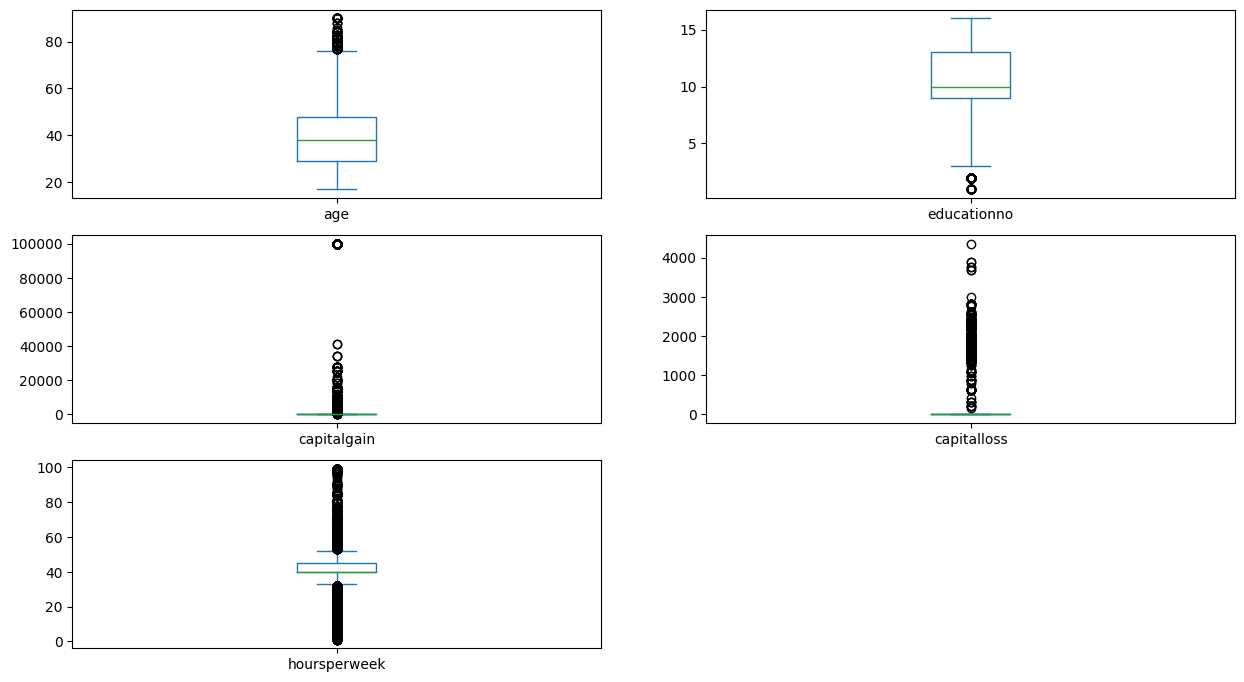

In [26]:
# Box plot find the outliers 

box_plot = train_cont_df.plot(kind="box",subplots=True,layout=(7,2),figsize=(15,20));

# Calculate the IQR for each variable
Q1 = train_cont_df.quantile(0.25)
Q3 = train_cont_df.quantile(0.75)
IQR = Q3 - Q1

# Set the IQR multiplier for identifying potential outliers
IQR_multiplier = 1.5  # Adjust as needed

# Get the indices of the outliers
outlier_indices = []

for col, ax in zip(train_cont_df.columns, box_plot):
    outliers = ((train_cont_df[col] < (Q1[col] - IQR_multiplier * IQR[col])) | (train_cont_df[col] > (Q3[col] + IQR_multiplier * IQR[col])))
    col_outlier_indices = train_cont_df.index[outliers]
    outlier_indices.extend(col_outlier_indices)

outlier_indices = list(set(outlier_indices))  # Remove duplicate indices

# Display the outlier indices
print("Indices of outliers from the box plots:")
print(outlier_indices)
print(len(outlier_indices))

### Using IQR to detect the outliers

In [27]:
# Calculate quartiles and IQR for each column
Q1 = train_cont_df.quantile(0.25)
Q3 = train_cont_df.quantile(0.75)
IQR = Q3 - Q1

# Define outlier threshold
outlier_threshold = 1.5 * IQR

# Identify outlier indices for each column
outlier_indices = []
for column in train_cont_df.columns:
    column_outliers = train_cont_df[(train_cont_df[column] < Q1[column] - outlier_threshold[column]) | 
                         (train_cont_df[column] > Q3[column] + outlier_threshold[column])].index
    outlier_indices.extend(column_outliers)

# Remove duplicate indices
outlier_indices = list(set(outlier_indices))

print("Outlier Indices:", outlier_indices)
print(len(outlier_indices))


Outlier Indices: [0, 1, 6, 8, 9, 10, 12, 19, 20, 22, 26, 30, 32, 35, 48, 49, 50, 55, 56, 59, 64, 66, 68, 71, 73, 77, 85, 88, 93, 97, 103, 104, 109, 112, 117, 120, 121, 122, 126, 128, 132, 133, 135, 136, 137, 138, 145, 146, 155, 156, 157, 159, 162, 165, 166, 175, 176, 180, 183, 184, 186, 188, 191, 192, 193, 194, 200, 203, 206, 207, 208, 210, 211, 213, 217, 221, 224, 226, 229, 232, 234, 237, 241, 242, 243, 245, 250, 251, 255, 258, 259, 260, 264, 265, 271, 274, 275, 277, 278, 279, 281, 287, 289, 291, 293, 296, 298, 301, 303, 305, 313, 314, 317, 318, 319, 322, 323, 326, 332, 335, 336, 339, 342, 343, 347, 350, 353, 357, 359, 360, 367, 372, 373, 374, 376, 378, 381, 384, 385, 388, 389, 393, 394, 395, 398, 399, 400, 402, 407, 416, 422, 426, 427, 428, 431, 432, 435, 436, 438, 439, 443, 444, 446, 449, 452, 453, 454, 465, 469, 473, 475, 476, 479, 482, 489, 491, 500, 511, 513, 516, 518, 523, 524, 525, 534, 535, 537, 538, 540, 543, 544, 547, 555, 556, 559, 560, 561, 563, 564, 565, 566, 567, 568, 56

### Using Z-Scores to detect the outliers

In [28]:
# Calculate mean and standard deviation for each column
means = train_cont_df.mean()
stds = train_cont_df.std()

# Define Z-score threshold (e.g., ±2 or ±3)
z_score_threshold = 3

# Identify outlier indices for each column
outlier_indices = []
for column in train_cont_df.columns:
    z_scores = np.abs((train_cont_df[column] - means[column]) / stds[column])
    column_outliers = z_scores[z_scores > z_score_threshold].index
    outlier_indices.extend(column_outliers)

# Remove duplicate indices
outlier_indices = list(set(outlier_indices))

print("Outlier Indices:", outlier_indices)
print(len(outlier_indices))

Outlier Indices: [24579, 8200, 24585, 10, 24589, 16401, 16402, 22, 24600, 26, 8221, 30, 16418, 16424, 16428, 8237, 48, 16433, 24625, 8249, 8252, 68, 24647, 8265, 24650, 16459, 16460, 16465, 16467, 24660, 24663, 24664, 88, 24667, 24669, 16479, 103, 24689, 8308, 117, 121, 24699, 24701, 8324, 24709, 133, 24711, 8325, 138, 24714, 8333, 8334, 16526, 145, 16536, 24731, 157, 24734, 159, 8357, 8358, 24744, 24747, 175, 16567, 24761, 186, 16570, 16575, 8386, 8389, 24781, 206, 208, 24791, 16600, 24794, 16602, 16607, 226, 24804, 16613, 229, 8424, 24811, 16622, 16628, 24824, 251, 16644, 16646, 24838, 16648, 16656, 24851, 277, 24854, 24865, 16678, 298, 16682, 16684, 24875, 303, 16688, 24882, 24889, 16701, 16705, 24898, 8518, 8519, 24905, 16716, 16718, 335, 16720, 24916, 24918, 16728, 24921, 8544, 353, 359, 16743, 8557, 24941, 8560, 16756, 373, 374, 24949, 24953, 384, 16771, 24967, 24968, 394, 24974, 400, 8593, 16785, 8594, 8614, 426, 16814, 431, 16820, 8629, 16821, 8632, 16847, 469, 25049, 16859, 47

### Calculating the range for the continuous variable to check the outliers. 

In [29]:
train_cont_df.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,26903.000000,26903.000000,26903.000000,26903.000000,26903.000000
mean,39.049140,10.144296,1215.443259,98.427499,41.164591
std,13.188825,2.620154,7805.366384,425.493211,12.347051
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,29.000000,9.000000,0.000000,0.000000,40.000000
50%,38.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


#### Even though the outlier methods shows so many records as outliers, it is important to consider the domain knowleage to treat or change any records in the dataset.

#### We need to carefully consider each feature and we need to treat the outliers accordling.

#### 1. Feature Age has outliers but none of the value is negative. The values range from 17 to 90 which is a reasonable range for the dataset. Hence no outlier treatment is required.

#### 2. Feature educationno has outliers but none of the value is negative. The values range from 1 to 16 which is a reasonable range for the dataset. Hence no outlier treatment is required.

#### 3. Feature capitalgain has some outliers which is not in the reasonable range for the dataset. Hence we need to treat this outlier. But none of the record is negative. Hence each record is valueable record.

#### 4. Feature capitalloss has some outliers which is not in the reasonable range for the dataset. Hence we need to treat this outlier. But none of the record is negative. Hence each record is valueable record.

#### 5. Feature hoursperweek has outliers but none of the value is negative. The values range from 1 to 90 which is a reasonable range for the dataset. Hence no outlier treatment is required.

In [30]:
# Create a copy of the DataFrame
train_cont_df2 = train_cont_df.copy()

In [31]:
train_cont_df2

,age,educationno,capitalgain,capitalloss,hoursperweek
0,39,13,2174,0,40
1,50,13,0,0,13
2,38,9,0,0,40
3,53,7,0,0,40
4,28,13,0,0,40
...,...,...,...,...,...
26898,53,14,0,0,40
26899,22,10,0,0,40
26900,27,12,0,0,38
26901,58,9,0,0,40


### Manually finding the extreme outliers and replacing with the median value.

In [32]:
# Filter DataFrame to find records where previous duration is greater than the threshold
record1 = train_cont_df2[train_cont_df2["capitalgain"] > 60000]
record2 = train_cont_df2[train_cont_df2["capitalloss"] > 3770]
print(record1, record2)

       age  educationno  capitalgain  capitalloss  hoursperweek
1134    54           15        99999            0            60
1245    52            9        99999            0            40
1349    53            9        99999            0            40
1394    52           13        99999            0            50
1470    46           15        99999            0            60
...    ...          ...          ...          ...           ...
25765   22           10        99999            0            55
26325   47           14        99999            0            55
26448   43           15        99999            0            40
26654   47           15        99999            0            40
26869   57            9        99999            0            40

[147 rows x 5 columns]        age  educationno  capitalgain  capitalloss  hoursperweek
12816   82            9            0         4356            18
17427   54            4            0         3900            40
20106   41      

In [33]:
import pandas as pd

# Create lists of indices from the filtered records
indices_record1 = record1.index.tolist()
indices_record2 = record2.index.tolist()

# Calculate the median values for the columns used for filtering
median_capitalgain = train_cont_df2["capitalgain"].median()
median_capitalloss = train_cont_df2["capitalloss"].median()

# Replace values in the original DataFrame at specified indices with the respective median values
train_cont_df2.loc[indices_record1, "capitalgain"] = median_capitalgain
train_cont_df2.loc[indices_record2, "capitalloss"] = median_capitalloss


In [34]:
# Filter DataFrame to find records where previous duration is greater than the threshold
record1 = train_cont_df2[train_cont_df2["capitalgain"] > 60000]
record2 = train_cont_df2[train_cont_df2["capitalloss"] > 3770]
print(record1, record2)

Empty DataFrame
Columns: [age, educationno, capitalgain, capitalloss, hoursperweek]
Index: [] Empty DataFrame
Columns: [age, educationno, capitalgain, capitalloss, hoursperweek]
Index: []


In [35]:
train_cont_df2

,age,educationno,capitalgain,capitalloss,hoursperweek
0,39,13,2174,0,40
1,50,13,0,0,13
2,38,9,0,0,40
3,53,7,0,0,40
4,28,13,0,0,40
...,...,...,...,...,...
26898,53,14,0,0,40
26899,22,10,0,0,40
26900,27,12,0,0,38
26901,58,9,0,0,40


### Calculating the range for the continuous variable after outlier treatment.

In [36]:
train_cont_df2.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,26903.000000,26903.000000,26903.000000,26903.000000,26903.000000
mean,39.049140,10.144296,669.041259,97.975653,41.164591
std,13.188825,2.620154,2704.031090,423.434908,12.347051
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,29.000000,9.000000,0.000000,0.000000,40.000000
50%,38.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,41310.000000,3770.000000,99.000000


In [37]:
train_cont_df2

,age,educationno,capitalgain,capitalloss,hoursperweek
0,39,13,2174,0,40
1,50,13,0,0,13
2,38,9,0,0,40
3,53,7,0,0,40
4,28,13,0,0,40
...,...,...,...,...,...
26898,53,14,0,0,40
26899,22,10,0,0,40
26900,27,12,0,0,38
26901,58,9,0,0,40


### Box plot after outlier treatment.

Indices of outliers from the box plots:
[0, 1, 6, 8, 9, 10, 12, 19, 20, 22, 26, 30, 32, 35, 48, 49, 50, 55, 56, 59, 64, 66, 68, 71, 73, 77, 85, 88, 93, 97, 103, 104, 109, 112, 117, 120, 121, 122, 126, 128, 132, 133, 135, 136, 137, 138, 145, 146, 155, 156, 157, 159, 162, 165, 166, 175, 176, 180, 183, 184, 186, 188, 191, 192, 193, 194, 200, 203, 206, 207, 208, 210, 211, 213, 217, 221, 224, 226, 229, 232, 234, 237, 241, 242, 243, 245, 250, 251, 255, 258, 259, 260, 264, 265, 271, 274, 275, 277, 278, 279, 281, 287, 289, 291, 293, 296, 298, 301, 303, 305, 313, 314, 317, 318, 319, 322, 323, 326, 332, 335, 336, 339, 342, 343, 347, 350, 353, 357, 359, 360, 367, 372, 373, 374, 376, 378, 381, 384, 385, 388, 389, 393, 394, 395, 398, 399, 400, 402, 407, 416, 422, 426, 427, 428, 431, 432, 435, 436, 438, 439, 443, 444, 446, 449, 452, 453, 454, 465, 469, 473, 475, 476, 479, 482, 489, 491, 500, 511, 513, 516, 518, 523, 524, 525, 534, 535, 537, 538, 540, 543, 544, 547, 555, 556, 559, 560, 561, 563, 564,

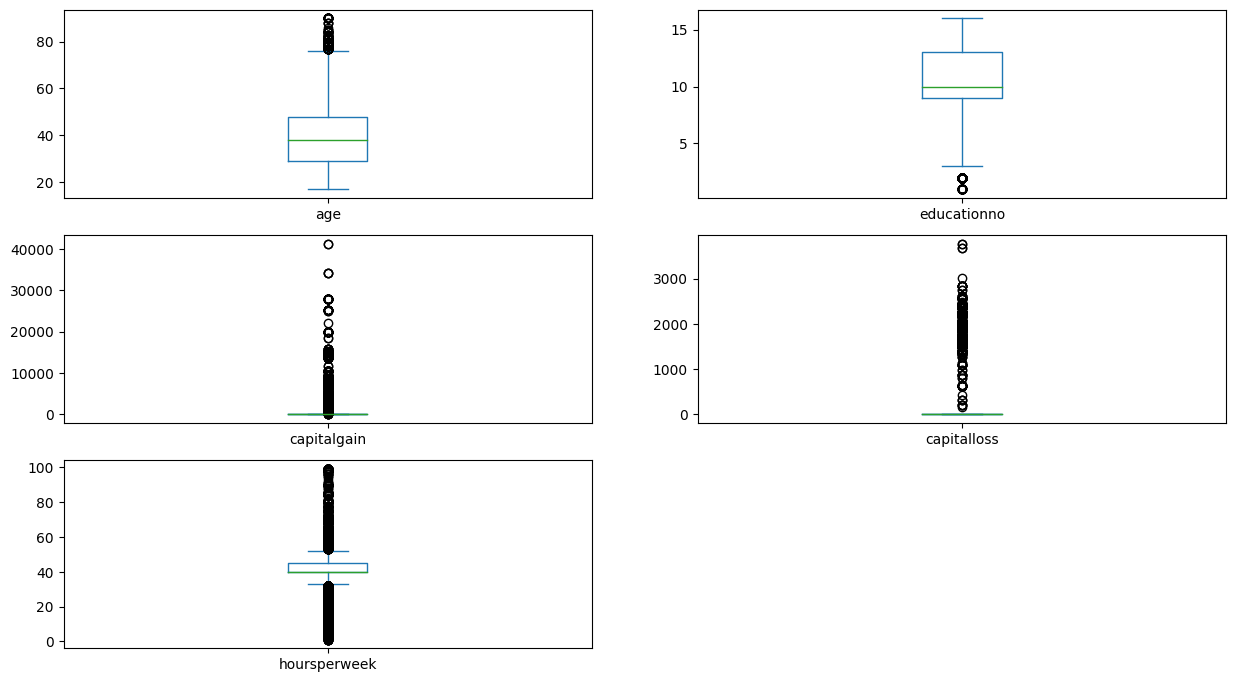

In [38]:
# Box plot find the outliers 

box_plot = train_cont_df2.plot(kind="box",subplots=True,layout=(7,2),figsize=(15,20));

# Calculate the IQR for each variable
Q1 = train_cont_df2.quantile(0.25)
Q3 = train_cont_df2.quantile(0.75)
IQR = Q3 - Q1

# Set the IQR multiplier for identifying potential outliers
IQR_multiplier = 1.5  # Adjust as needed

# Get the indices of the outliers
outlier_indices = []

for col, ax in zip(train_cont_df2.columns, box_plot):
    outliers = ((train_cont_df2[col] < (Q1[col] - IQR_multiplier * IQR[col])) | (train_cont_df2[col] > (Q3[col] + IQR_multiplier * IQR[col])))
    col_outlier_indices = train_cont_df2.index[outliers]
    outlier_indices.extend(col_outlier_indices)

outlier_indices = list(set(outlier_indices))  # Remove duplicate indices

# Display the outlier indices
print("Indices of outliers from the box plots:")
print(outlier_indices)
print(len(outlier_indices))

In [39]:
train_cont_df2

,age,educationno,capitalgain,capitalloss,hoursperweek
0,39,13,2174,0,40
1,50,13,0,0,13
2,38,9,0,0,40
3,53,7,0,0,40
4,28,13,0,0,40
...,...,...,...,...,...
26898,53,14,0,0,40
26899,22,10,0,0,40
26900,27,12,0,0,38
26901,58,9,0,0,40


In [40]:
# Correlation matrix to check the multi collinearity of the features
train_cont_df2.corr()

,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.000000,0.038048,0.113735,0.051256,0.072529
educationno,0.038048,1.000000,0.145808,0.081403,0.145491
capitalgain,0.113735,0.145808,1.000000,-0.057252,0.080367
capitalloss,0.051256,0.081403,-0.057252,1.000000,0.050113
hoursperweek,0.072529,0.145491,0.080367,0.050113,1.000000


<AxesSubplot: >

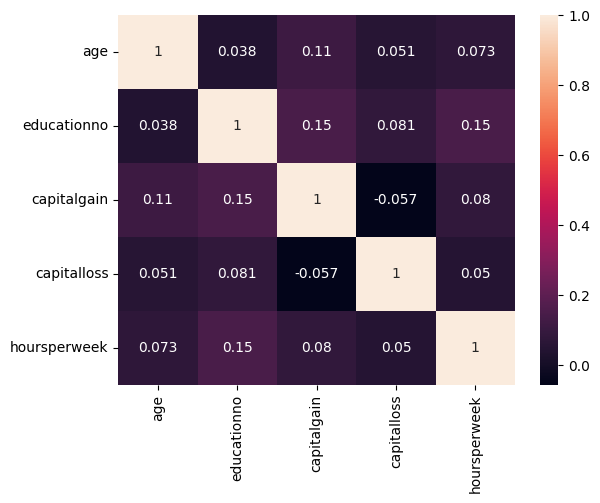

In [41]:
# Heatmaps for the given dataset.
sns.heatmap(train_cont_df2.corr(), annot=True)

### None of the value is near or equal to 1 or -1 for the continuous features. Hence no multicolinearity present.

In [42]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
def calculate_vif(data_frame):
    vif_data = pd.DataFrame()
    vif_data["feature"] = data_frame.columns
    vif_data["VIF"] = [variance_inflation_factor(data_frame.values, i) for i in range(data_frame.shape[1])]
    return vif_data

vif_results = calculate_vif(train_cont_df2)  
print("VIF Results:")
print(vif_results)

VIF Results:
        feature        VIF
0           age   7.633447
1   educationno  10.461783
2   capitalgain   1.084782
3   capitalloss   1.066132
4  hoursperweek   9.671481


### VIF value for all the features is very low. Hence all the variables are significant and there is no presence of multicollinearity.

### From both the correlation matrix and the VIF value show that none of the feature depend on each other. Hence there is no multicollinearity present in the dataset.

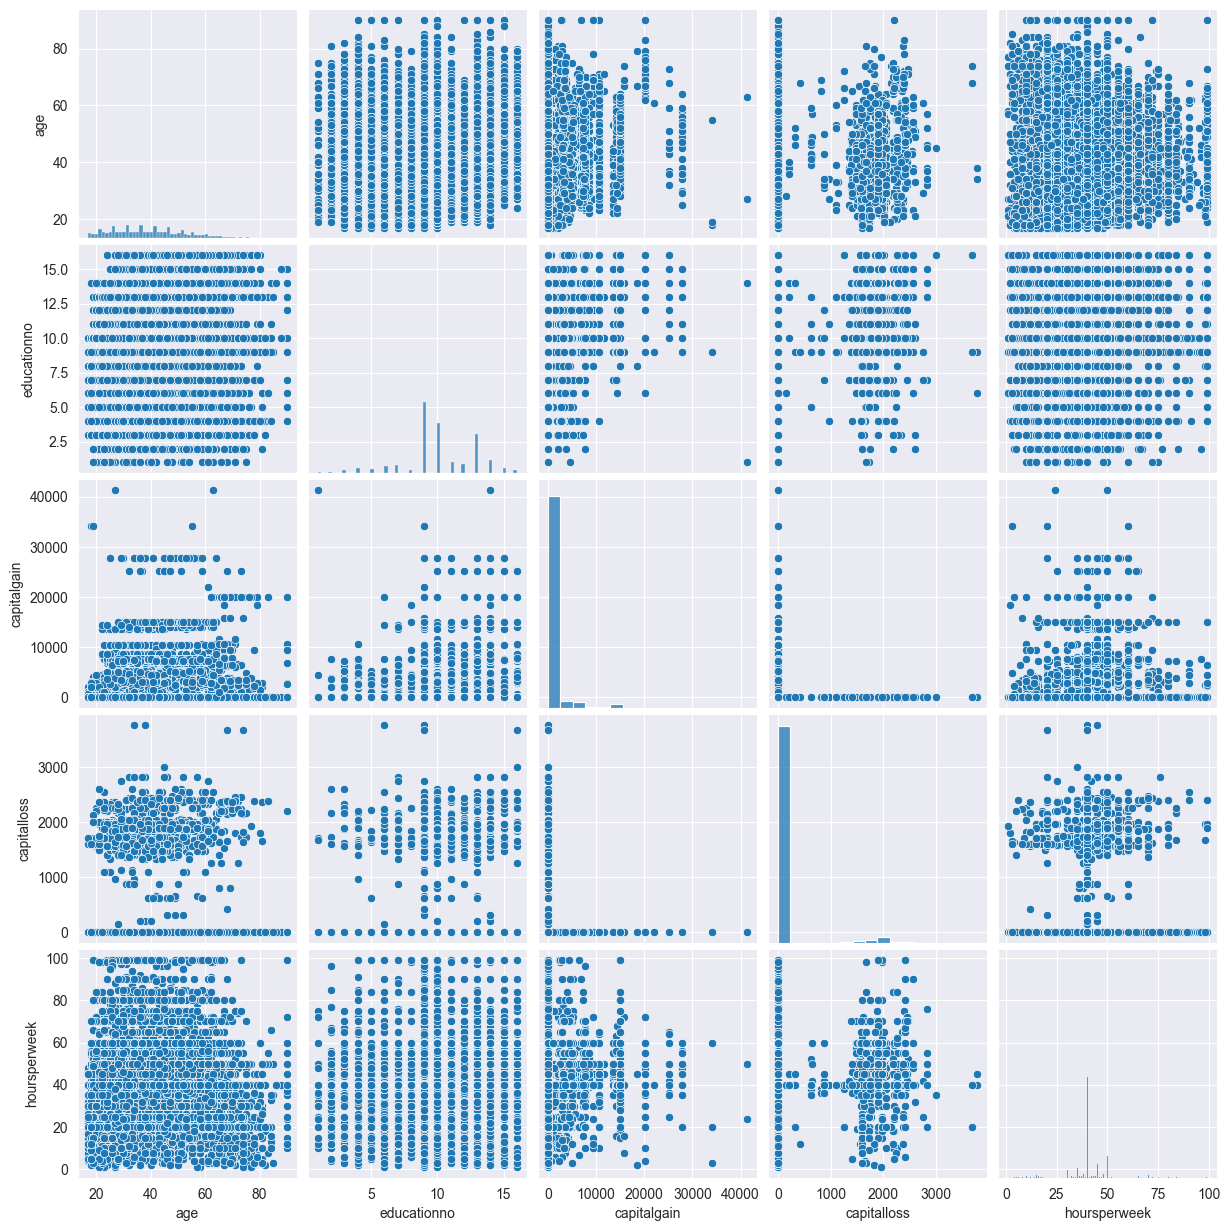

In [43]:
# Drawing Histogram to check the distribution of the data.
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(train_cont_df2)

### Most of the histogram shows that the features are not normally distributed.

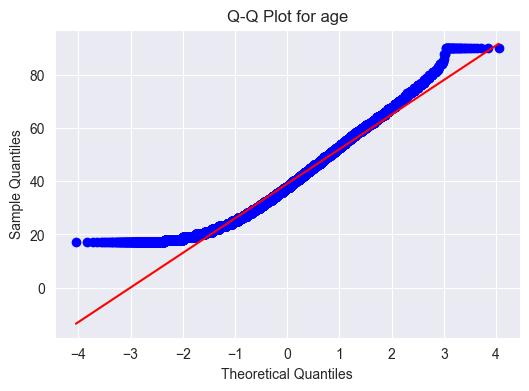

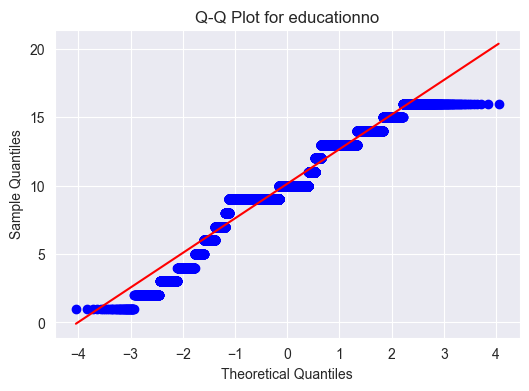

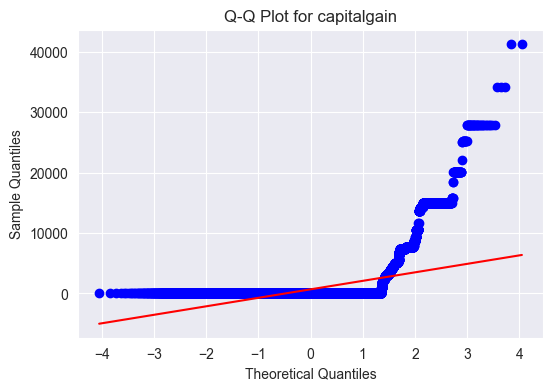

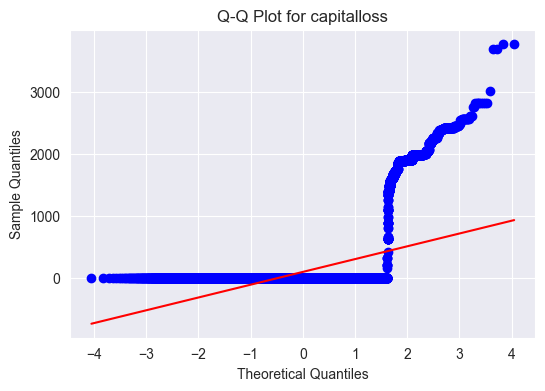

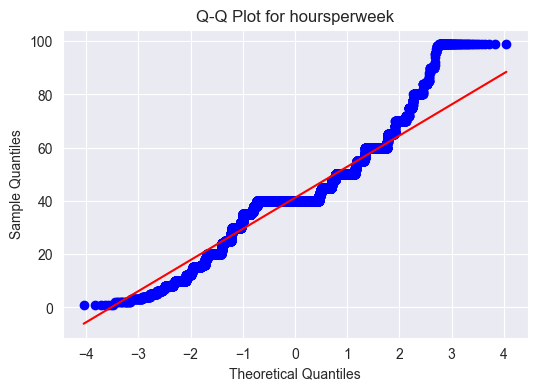

In [44]:
# Using Q-Q plot for checking the data distribution
# Create Q-Q plots for each variable in separate graphs
for col in train_cont_df2.columns:
    plt.figure(figsize=(6, 4))
    stats.probplot(train_cont_df2[col], dist="norm", plot=plt)
    plt.title(f"Q-Q Plot for {col}")
    plt.xlabel("Theoretical Quantiles")
    plt.ylabel("Sample Quantiles")
    plt.grid(True)
    plt.show()

### Most of the Q-Q plot shows that features are not normally distributed.

### Hence we can use Normalization for transformation.

In [45]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the Normalization
min_max_scaler = MinMaxScaler()

# Fit and transform the data using standardization
normalized_data_minmax = min_max_scaler.fit_transform(train_cont_df2)


# Create a new DataFrame with the standardized data
train_norm_df = pd.DataFrame(normalized_data_minmax, columns = train_cont_df2.columns)

In [46]:
train_norm_df

,age,educationno,capitalgain,capitalloss,hoursperweek
0,0.301370,0.800000,0.052626,0.0,0.397959
1,0.452055,0.800000,0.000000,0.0,0.122449
2,0.287671,0.533333,0.000000,0.0,0.397959
3,0.493151,0.400000,0.000000,0.0,0.397959
4,0.150685,0.800000,0.000000,0.0,0.397959
...,...,...,...,...,...
26898,0.493151,0.866667,0.000000,0.0,0.397959
26899,0.068493,0.600000,0.000000,0.0,0.397959
26900,0.136986,0.733333,0.000000,0.0,0.377551
26901,0.561644,0.533333,0.000000,0.0,0.397959


### Pre-processing of Training Categorical variable dataframe.

In [47]:
train_cat_df.head(5)

,workclass,education,maritalstatus,occupation,relationship,race,sex,native,Salary
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [48]:
# Replace 'desired_columns' with a list of column names for which you want to find unique values
desired_columns = ["workclass", "education", "maritalstatus", "occupation", "relationship", "race", "sex", "native", "Salary"]

# Create an empty dictionary to store unique values for each column
unique_values_dict = {}

# Loop through the desired columns and find unique values for each
for column in desired_columns:
    unique_values = train_cat_df[column].unique()
    unique_values_dict[column] = unique_values


In [49]:
unique_values_dict

{'workclass': array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
        ' Local-gov', ' Self-emp-inc', ' Without-pay'], dtype=object),
 'education': array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
        ' Some-college', ' Assoc-acdm', ' 7th-8th', ' Doctorate',
        ' Assoc-voc', ' Prof-school', ' 5th-6th', ' 10th', ' Preschool',
        ' 12th', ' 1st-4th'], dtype=object),
 'maritalstatus': array([' Never-married', ' Married-civ-spouse', ' Divorced',
        ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
        ' Widowed'], dtype=object),
 'occupation': array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
        ' Prof-specialty', ' Other-service', ' Sales', ' Transport-moving',
        ' Farming-fishing', ' Machine-op-inspct', ' Tech-support',
        ' Craft-repair', ' Protective-serv', ' Armed-Forces',
        ' Priv-house-serv'], dtype=object),
 'relationship': array([' Not-in-family', ' Husband', ' Wife', ' Own-c

In [50]:
train_cat_df

,workclass,education,maritalstatus,occupation,relationship,race,sex,native,Salary
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...
26898,Private,Masters,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,>50K
26899,Private,Some-college,Never-married,Protective-serv,Not-in-family,White,Male,United-States,<=50K
26900,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
26901,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K


### Applying Label encoder to Sex column as it has only two categories.

In [51]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
encoder = LabelEncoder()

# Fit and transform the dataset
encoded_labels = encoder.fit_transform(train_cat_df["sex"])

# Add encoded labels to the DataFrame
train_cat_df["sex"] = encoded_labels

### Applying Label encoder to Salary column as it has only two categories. 

In [52]:
# Initialize LabelEncoder
encoder = LabelEncoder()

# Fit and transform the dataset
encoded_labels = encoder.fit_transform(train_cat_df["Salary"])

# Add encoded labels to the DataFrame
train_cat_df["Salary"] = encoded_labels

In [53]:
train_cat_df.head(2)

,workclass,education,maritalstatus,occupation,relationship,race,sex,native,Salary
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,1,United-States,0
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,1,United-States,0


In [54]:
# Rearrange dataframe

train_cat_df = train_cat_df[["sex", "Salary", "workclass", "education", "maritalstatus", "occupation", "relationship", "race", "native"]]

In [55]:
train_cat_df

,sex,Salary,workclass,education,maritalstatus,occupation,relationship,race,native
0,1,0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,United-States
1,1,0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,United-States
2,1,0,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,United-States
3,1,0,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,United-States
4,0,0,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Cuba
...,...,...,...,...,...,...,...,...,...
26898,1,1,Private,Masters,Married-civ-spouse,Exec-managerial,Husband,White,United-States
26899,1,0,Private,Some-college,Never-married,Protective-serv,Not-in-family,White,United-States
26900,0,0,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,United-States
26901,0,0,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,United-States


### Applying dummy variables on WorkClass column. 

In [56]:
import pandas as pd

# Create dummy variables for the 'Category' column
dummy_df = pd.get_dummies(train_cat_df['workclass'], prefix='workclass', drop_first=True)

# Drop the original 'Category' column from the original DataFrame
train_cat_df.drop(columns=['workclass'], inplace=True)

# Concatenate the original DataFrame and the dummy DataFrame
train_cat_df = pd.concat([train_cat_df, dummy_df], axis=1)

In [57]:
train_cat_df

,sex,Salary,education,maritalstatus,occupation,relationship,race,native,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay
0,1,0,Bachelors,Never-married,Adm-clerical,Not-in-family,White,United-States,0,0,0,0,1,0
1,1,0,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,United-States,0,0,0,1,0,0
2,1,0,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,United-States,0,1,0,0,0,0
3,1,0,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,United-States,0,1,0,0,0,0
4,0,0,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Cuba,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26898,1,1,Masters,Married-civ-spouse,Exec-managerial,Husband,White,United-States,0,1,0,0,0,0
26899,1,0,Some-college,Never-married,Protective-serv,Not-in-family,White,United-States,0,1,0,0,0,0
26900,0,0,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,United-States,0,1,0,0,0,0
26901,0,0,HS-grad,Widowed,Adm-clerical,Unmarried,White,United-States,0,1,0,0,0,0


### Applying dummy variables on Education column. 

In [58]:
import pandas as pd

# Create dummy variables for the 'Category' column
dummy_df1 = pd.get_dummies(train_cat_df['education'], prefix='education', drop_first=True)

# Drop the original 'Category' column from the original DataFrame
train_cat_df.drop(columns=['education'], inplace=True)

# Concatenate the original DataFrame and the dummy DataFrame
train_cat_df = pd.concat([train_cat_df, dummy_df1], axis=1)

In [59]:
train_cat_df

,sex,Salary,maritalstatus,occupation,relationship,race,native,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college
0,1,0,Never-married,Adm-clerical,Not-in-family,White,United-States,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1,0,Married-civ-spouse,Exec-managerial,Husband,White,United-States,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,0,Divorced,Handlers-cleaners,Not-in-family,White,United-States,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,1,0,Married-civ-spouse,Handlers-cleaners,Husband,Black,United-States,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,Married-civ-spouse,Prof-specialty,Wife,Black,Cuba,0,1,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26898,1,1,Married-civ-spouse,Exec-managerial,Husband,White,United-States,0,1,0,...,0,0,0,0,0,0,1,0,0,0
26899,1,0,Never-married,Protective-serv,Not-in-family,White,United-States,0,1,0,...,0,0,0,0,0,0,0,0,0,1
26900,0,0,Married-civ-spouse,Tech-support,Wife,White,United-States,0,1,0,...,0,1,0,0,0,0,0,0,0,0
26901,0,0,Widowed,Adm-clerical,Unmarried,White,United-States,0,1,0,...,0,0,0,0,0,1,0,0,0,0


### Applying dummy variables on Marital Status column. 

In [60]:
import pandas as pd

# Create dummy variables for the 'Category' column
dummy_df2 = pd.get_dummies(train_cat_df['maritalstatus'], prefix='maritalstatus', drop_first=True)

# Drop the original 'Category' column from the original DataFrame
train_cat_df.drop(columns=['maritalstatus'], inplace=True)

# Concatenate the original DataFrame and the dummy DataFrame
train_cat_df = pd.concat([train_cat_df, dummy_df2], axis=1)

In [61]:
train_cat_df

,sex,Salary,occupation,relationship,race,native,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,maritalstatus_ Married-AF-spouse,maritalstatus_ Married-civ-spouse,maritalstatus_ Married-spouse-absent,maritalstatus_ Never-married,maritalstatus_ Separated,maritalstatus_ Widowed
0,1,0,Adm-clerical,Not-in-family,White,United-States,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,Exec-managerial,Husband,White,United-States,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,1,0,Handlers-cleaners,Not-in-family,White,United-States,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,Handlers-cleaners,Husband,Black,United-States,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,Prof-specialty,Wife,Black,Cuba,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26898,1,1,Exec-managerial,Husband,White,United-States,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
26899,1,0,Protective-serv,Not-in-family,White,United-States,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
26900,0,0,Tech-support,Wife,White,United-States,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
26901,0,0,Adm-clerical,Unmarried,White,United-States,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


### Applying dummy variables on Occupation column.

In [62]:
import pandas as pd

# Create dummy variables for the 'Category' column
dummy_df3 = pd.get_dummies(train_cat_df['occupation'], prefix='occupation', drop_first=True)

# Drop the original 'Category' column from the original DataFrame
train_cat_df.drop(columns=['occupation'], inplace=True)

# Concatenate the original DataFrame and the dummy DataFrame
train_cat_df = pd.concat([train_cat_df, dummy_df3], axis=1)

In [63]:
train_cat_df

,sex,Salary,relationship,race,native,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving
0,1,0,Not-in-family,White,United-States,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0,Husband,White,United-States,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,Not-in-family,White,United-States,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1,0,Husband,Black,United-States,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,Wife,Black,Cuba,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26898,1,1,Husband,White,United-States,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26899,1,0,Not-in-family,White,United-States,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
26900,0,0,Wife,White,United-States,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
26901,0,0,Unmarried,White,United-States,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Applying dummy variables on Relationship column.

In [64]:
import pandas as pd

# Create dummy variables for the 'Category' column
dummy_df4 = pd.get_dummies(train_cat_df['relationship'], prefix='relationship', drop_first=True)

# Drop the original 'Category' column from the original DataFrame
train_cat_df.drop(columns=['relationship'], inplace=True)

# Concatenate the original DataFrame and the dummy DataFrame
train_cat_df = pd.concat([train_cat_df, dummy_df4], axis=1)

In [65]:
train_cat_df

,sex,Salary,race,native,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,...,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife
0,1,0,White,United-States,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,1,0,White,United-States,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,White,United-States,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1,0,Black,United-States,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,Black,Cuba,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26898,1,1,White,United-States,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26899,1,0,White,United-States,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
26900,0,0,White,United-States,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
26901,0,0,White,United-States,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### Applying dummy variables on Race column.

In [66]:
import pandas as pd

# Create dummy variables for the 'Category' column
dummy_df5 = pd.get_dummies(train_cat_df['race'], prefix='race', drop_first=True)

# Drop the original 'Category' column from the original DataFrame
train_cat_df.drop(columns=['race'], inplace=True)

# Concatenate the original DataFrame and the dummy DataFrame
train_cat_df = pd.concat([train_cat_df, dummy_df5], axis=1)

In [67]:
train_cat_df

,sex,Salary,native,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 11th,...,occupation_ Transport-moving,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White
0,1,0,United-States,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
1,1,0,United-States,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,United-States,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,1,0,United-States,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0,0,Cuba,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26898,1,1,United-States,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
26899,1,0,United-States,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
26900,0,0,United-States,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
26901,0,0,United-States,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


### Applying dummy variables on Native column.

In [68]:
import pandas as pd

# Create dummy variables for the 'Category' column
dummy_df6 = pd.get_dummies(train_cat_df['native'], prefix='native', drop_first=True)

# Drop the original 'Category' column from the original DataFrame
train_cat_df.drop(columns=['native'], inplace=True)

# Concatenate the original DataFrame and the dummy DataFrame
train_cat_df = pd.concat([train_cat_df, dummy_df6], axis=1)

In [69]:
train_cat_df

,sex,Salary,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 11th,education_ 12th,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26898,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
26899,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
26900,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
26901,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


### Mearging training normalized continuous variable dataframe and encoded dataframe. 

In [70]:
# Concatenate the original DataFrame and the encoded DataFrame
train_norm_final_df = pd.concat([train_norm_df, train_cat_df], axis=1)

In [71]:
train_norm_final_df

,age,educationno,capitalgain,capitalloss,hoursperweek,sex,Salary,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,0.301370,0.800000,0.052626,0.0,0.397959,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.452055,0.800000,0.000000,0.0,0.122449,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.287671,0.533333,0.000000,0.0,0.397959,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0.493151,0.400000,0.000000,0.0,0.397959,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0.150685,0.800000,0.000000,0.0,0.397959,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26898,0.493151,0.866667,0.000000,0.0,0.397959,1,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
26899,0.068493,0.600000,0.000000,0.0,0.397959,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
26900,0.136986,0.733333,0.000000,0.0,0.377551,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
26901,0.561644,0.533333,0.000000,0.0,0.397959,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


### Mearging original continuous variable dataframe and encoded dataframe.

In [72]:
# Concatenate the original DataFrame and the encoded DataFrame
train_org_final_df = pd.concat([train_cont_df2, train_cat_df], axis=1)

In [73]:
train_org_final_df

,age,educationno,capitalgain,capitalloss,hoursperweek,sex,Salary,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,39,13,2174,0,40,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,0,0,13,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,9,0,0,40,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,53,7,0,0,40,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,28,13,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26898,53,14,0,0,40,1,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
26899,22,10,0,0,40,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
26900,27,12,0,0,38,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
26901,58,9,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


## Splitting of dataframe of the test dataset. 

In [74]:
# Dataframe to check the outliers for the continuous variable.

test_cont_df = test_salary_df[['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']]
test_cat_df = test_salary_df[['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary']]

### Pre-processing of test continuous variable dataframe.

In [75]:
test_cont_df

,age,educationno,capitalgain,capitalloss,hoursperweek
0,25,7,0,0,40
1,38,9,0,0,50
2,28,12,0,0,40
3,44,10,7688,0,40
4,34,6,0,0,30
...,...,...,...,...,...
14125,33,13,0,0,40
14126,39,13,0,0,36
14127,38,13,0,0,50
14128,44,13,5455,0,40


### Using Box Plot to detect the outliers

Indices of outliers from the box plots:
[3, 4, 5, 7, 8, 11, 13, 14, 15, 20, 21, 22, 24, 25, 38, 41, 42, 44, 46, 47, 48, 51, 52, 59, 60, 63, 69, 74, 77, 78, 80, 81, 82, 93, 96, 97, 98, 105, 108, 109, 110, 113, 116, 117, 123, 128, 129, 130, 131, 132, 133, 135, 136, 137, 138, 139, 141, 144, 145, 147, 153, 155, 157, 160, 166, 167, 168, 169, 174, 177, 188, 190, 192, 193, 195, 197, 199, 207, 209, 215, 216, 217, 218, 222, 223, 224, 225, 228, 230, 235, 238, 244, 245, 246, 247, 253, 254, 255, 258, 260, 266, 271, 272, 274, 275, 277, 280, 283, 284, 287, 288, 289, 291, 297, 301, 302, 303, 305, 306, 308, 310, 313, 316, 318, 319, 322, 324, 325, 328, 332, 333, 336, 337, 338, 339, 341, 347, 349, 352, 354, 359, 364, 369, 370, 371, 372, 376, 379, 382, 384, 389, 395, 399, 400, 401, 402, 405, 406, 407, 408, 411, 418, 419, 424, 434, 435, 436, 438, 439, 440, 442, 443, 447, 451, 452, 457, 461, 464, 465, 466, 468, 472, 475, 476, 479, 480, 486, 487, 491, 492, 494, 495, 496, 502, 506, 507, 510, 513, 516, 520, 5

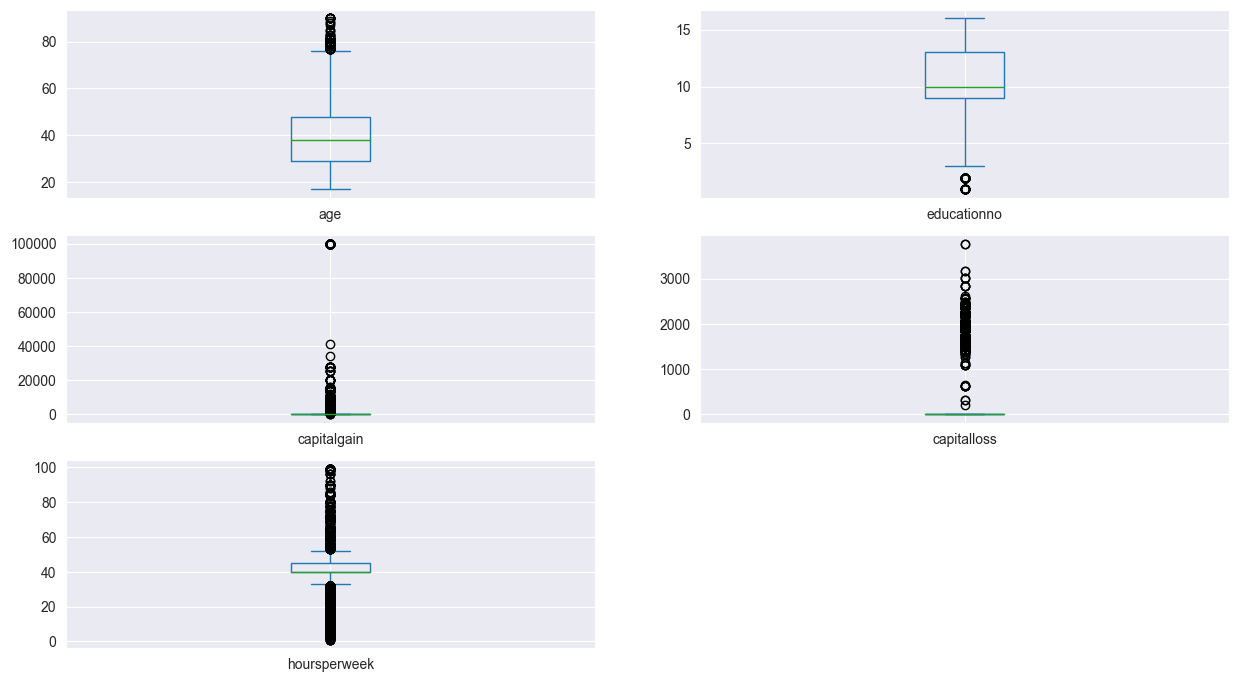

In [76]:
# Box plot find the outliers 

box_plot = test_cont_df.plot(kind="box",subplots=True,layout=(7,2),figsize=(15,20));

# Calculate the IQR for each variable
Q1 = test_cont_df.quantile(0.25)
Q3 = test_cont_df.quantile(0.75)
IQR = Q3 - Q1

# Set the IQR multiplier for identifying potential outliers
IQR_multiplier = 1.5  # Adjust as needed

# Get the indices of the outliers
outlier_indices = []

for col, ax in zip(train_cont_df.columns, box_plot):
    outliers = ((test_cont_df[col] < (Q1[col] - IQR_multiplier * IQR[col])) | (test_cont_df[col] > (Q3[col] + IQR_multiplier * IQR[col])))
    col_outlier_indices = test_cont_df.index[outliers]
    outlier_indices.extend(col_outlier_indices)

outlier_indices = list(set(outlier_indices))  # Remove duplicate indices

# Display the outlier indices
print("Indices of outliers from the box plots:")
print(outlier_indices)
print(len(outlier_indices))

### Using IQR to detect the outliers

In [77]:
# Calculate quartiles and IQR for each column
Q1 = test_cont_df.quantile(0.25)
Q3 = test_cont_df.quantile(0.75)
IQR = Q3 - Q1

# Define outlier threshold
outlier_threshold = 1.5 * IQR

# Identify outlier indices for each column
outlier_indices = []
for column in test_cont_df.columns:
    column_outliers = test_cont_df[(test_cont_df[column] < Q1[column] - outlier_threshold[column]) | 
                         (test_cont_df[column] > Q3[column] + outlier_threshold[column])].index
    outlier_indices.extend(column_outliers)

# Remove duplicate indices
outlier_indices = list(set(outlier_indices))

print("Outlier Indices:", outlier_indices)
print(len(outlier_indices))


Outlier Indices: [3, 4, 5, 7, 8, 11, 13, 14, 15, 20, 21, 22, 24, 25, 38, 41, 42, 44, 46, 47, 48, 51, 52, 59, 60, 63, 69, 74, 77, 78, 80, 81, 82, 93, 96, 97, 98, 105, 108, 109, 110, 113, 116, 117, 123, 128, 129, 130, 131, 132, 133, 135, 136, 137, 138, 139, 141, 144, 145, 147, 153, 155, 157, 160, 166, 167, 168, 169, 174, 177, 188, 190, 192, 193, 195, 197, 199, 207, 209, 215, 216, 217, 218, 222, 223, 224, 225, 228, 230, 235, 238, 244, 245, 246, 247, 253, 254, 255, 258, 260, 266, 271, 272, 274, 275, 277, 280, 283, 284, 287, 288, 289, 291, 297, 301, 302, 303, 305, 306, 308, 310, 313, 316, 318, 319, 322, 324, 325, 328, 332, 333, 336, 337, 338, 339, 341, 347, 349, 352, 354, 359, 364, 369, 370, 371, 372, 376, 379, 382, 384, 389, 395, 399, 400, 401, 402, 405, 406, 407, 408, 411, 418, 419, 424, 434, 435, 436, 438, 439, 440, 442, 443, 447, 451, 452, 457, 461, 464, 465, 466, 468, 472, 475, 476, 479, 480, 486, 487, 491, 492, 494, 495, 496, 502, 506, 507, 510, 513, 516, 520, 522, 524, 527, 531, 532,

### Using Z-Scores to detect the outliers

In [78]:
# Calculate mean and standard deviation for each column
means = test_cont_df.mean()
stds = test_cont_df.std()

# Define Z-score threshold (e.g., ±2 or ±3)
z_score_threshold = 3

# Identify outlier indices for each column
outlier_indices = []
for column in test_cont_df.columns:
    z_scores = np.abs((test_cont_df[column] - means[column]) / stds[column])
    column_outliers = z_scores[z_scores > z_score_threshold].index
    outlier_indices.extend(column_outliers)

# Remove duplicate indices
outlier_indices = list(set(outlier_indices))

print("Outlier Indices:", outlier_indices)
print(len(outlier_indices))

Outlier Indices: [12288, 2050, 2051, 10243, 12294, 6151, 4103, 12296, 4108, 20, 2070, 2071, 8214, 12313, 4125, 6176, 12322, 8228, 12331, 2092, 46, 4145, 8243, 6196, 2104, 6201, 4155, 8254, 2115, 8259, 10310, 2119, 8263, 10313, 74, 4171, 4170, 6214, 8267, 8270, 2130, 10324, 4182, 6235, 12381, 6238, 4191, 4194, 12639, 12393, 6251, 12396, 6254, 6256, 2162, 10354, 12402, 8309, 117, 12408, 4217, 6272, 130, 4226, 12418, 6277, 4231, 2184, 6282, 8331, 12427, 141, 2189, 10381, 6294, 10396, 157, 4254, 12444, 12446, 2212, 10406, 166, 6314, 8364, 174, 6322, 2226, 12468, 6325, 8374, 4279, 6327, 10425, 12475, 6334, 6340, 4293, 6341, 8391, 2248, 4299, 12492, 2252, 6348, 4303, 10448, 2262, 215, 4315, 2268, 4316, 222, 10462, 4320, 10465, 12510, 12521, 8426, 10476, 238, 6384, 12533, 12535, 2300, 10493, 8446, 8450, 2306, 6404, 8451, 6410, 6411, 12556, 6413, 8461, 271, 10506, 274, 275, 12562, 277, 4374, 4375, 284, 2333, 4380, 6428, 4384, 12577, 4386, 4387, 10531, 2344, 297, 8489, 2348, 12588, 306, 12597, 

### Calculating the range for the test continuous variable to check the outliers.

In [79]:
test_cont_df.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,14130.000000,14130.000000,14130.000000,14130.000000,14130.000000
mean,39.155414,10.120736,1185.899292,94.499646,41.073885
std,13.429544,2.602557,7903.191981,417.955786,12.268036
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,29.000000,9.000000,0.000000,0.000000,40.000000
50%,38.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


#### Even though the outlier methods shows so many records as outliers, it is important to consider the domain knowleage to treat or change any records in the dataset.

#### We need to carefully consider each feature and we need to treat the outliers accordling.

#### 1. Feature Age has outliers but none of the value is negative. The values range from 17 to 90 which is a reasonable range for the dataset. Hence no outlier treatment is required.

#### 2. Feature educationno has outliers but none of the value is negative. The values range from 1 to 16 which is a reasonable range for the dataset. Hence no outlier treatment is required.

#### 3. Feature capitalgain has some outliers which is not in the reasonable range for the dataset. Hence we need to treat this outlier. But none of the record is negative. Hence each record is valueable record.

#### 4. Feature capitalloss has outliers but none of the value is negative. The values range from 0 to 3770 which is a reasonable range for the dataset. Hence no outlier treatment is required.

#### 5. Feature hoursperweek has outliers but none of the value is negative. The values range from 1 to 99 which is a reasonable range for the dataset. Hence no outlier treatment is required.

In [80]:
# Create a copy of the DataFrame
test_cont_df2 = test_cont_df.copy()

In [81]:
test_cont_df2.head(2)

,age,educationno,capitalgain,capitalloss,hoursperweek
0,25,7,0,0,40
1,38,9,0,0,50


### Manually finding the extreme outliers and replacing with the median value.

In [82]:
# Filter DataFrame to find records where previous duration is greater than the threshold
record3 = test_cont_df2[test_cont_df2["capitalgain"] > 60000]
print(record3)

       age  educationno  capitalgain  capitalloss  hoursperweek
318     39            9        99999            0            40
328     50           15        99999            0            80
384     54           15        99999            0            40
634     41           14        99999            0            55
643     43           13        99999            0            60
...    ...          ...          ...          ...           ...
13234   32           13        99999            0            60
13905   61           14        99999            0            30
13913   36           13        99999            0            45
13918   42           13        99999            0            42
13945   59           15        99999            0            84

[80 rows x 5 columns]


In [83]:
import pandas as pd

# Create lists of indices from the filtered records
indices_record3 = record3.index.tolist()

# Calculate the median values for the columns used for filtering
median_capitalgain = test_cont_df2["capitalgain"].median()

# Replace values in the original DataFrame at specified indices with the respective median values
test_cont_df2.loc[indices_record3, "capitalgain"] = median_capitalgain


In [84]:
# Filter DataFrame to find records where previous duration is greater than the threshold
record3 = test_cont_df2[test_cont_df2["capitalgain"] > 60000]
print(record3)

Empty DataFrame
Columns: [age, educationno, capitalgain, capitalloss, hoursperweek]
Index: []


### Calculating the range for the continuous variable after outlier treatment.

In [85]:
test_cont_df2.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,14130.000000,14130.000000,14130.000000,14130.000000,14130.000000
mean,39.155414,10.120736,619.733687,94.499646,41.073885
std,13.429544,2.602557,2619.694966,417.955786,12.268036
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,29.000000,9.000000,0.000000,0.000000,40.000000
50%,38.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,41310.000000,3770.000000,99.000000


In [86]:
test_cont_df2

,age,educationno,capitalgain,capitalloss,hoursperweek
0,25,7,0,0,40
1,38,9,0,0,50
2,28,12,0,0,40
3,44,10,7688,0,40
4,34,6,0,0,30
...,...,...,...,...,...
14125,33,13,0,0,40
14126,39,13,0,0,36
14127,38,13,0,0,50
14128,44,13,5455,0,40


### Box plot after outlier treatment.

Indices of outliers from the box plots:
[3, 4, 5, 7, 8, 11, 13, 14, 15, 20, 21, 22, 24, 25, 38, 41, 42, 44, 46, 47, 48, 51, 52, 59, 60, 63, 69, 74, 77, 78, 80, 81, 82, 93, 96, 97, 98, 105, 108, 109, 110, 113, 116, 117, 123, 128, 129, 130, 131, 132, 133, 135, 136, 137, 138, 139, 141, 144, 145, 147, 153, 155, 157, 160, 166, 167, 168, 169, 174, 177, 188, 190, 192, 193, 195, 197, 199, 207, 209, 215, 216, 217, 218, 222, 223, 224, 225, 228, 230, 235, 238, 244, 245, 246, 247, 253, 254, 255, 258, 260, 266, 271, 272, 274, 275, 277, 280, 283, 284, 287, 288, 289, 291, 297, 301, 302, 303, 305, 306, 308, 310, 313, 316, 319, 322, 324, 325, 328, 332, 333, 336, 337, 338, 339, 341, 347, 349, 352, 354, 359, 364, 369, 370, 371, 372, 376, 379, 382, 389, 395, 399, 400, 401, 402, 405, 406, 407, 408, 411, 418, 419, 424, 434, 435, 436, 438, 439, 440, 442, 443, 447, 451, 452, 457, 461, 464, 465, 466, 468, 472, 475, 476, 479, 480, 486, 487, 491, 492, 494, 495, 496, 502, 506, 507, 510, 513, 516, 520, 522, 524, 5

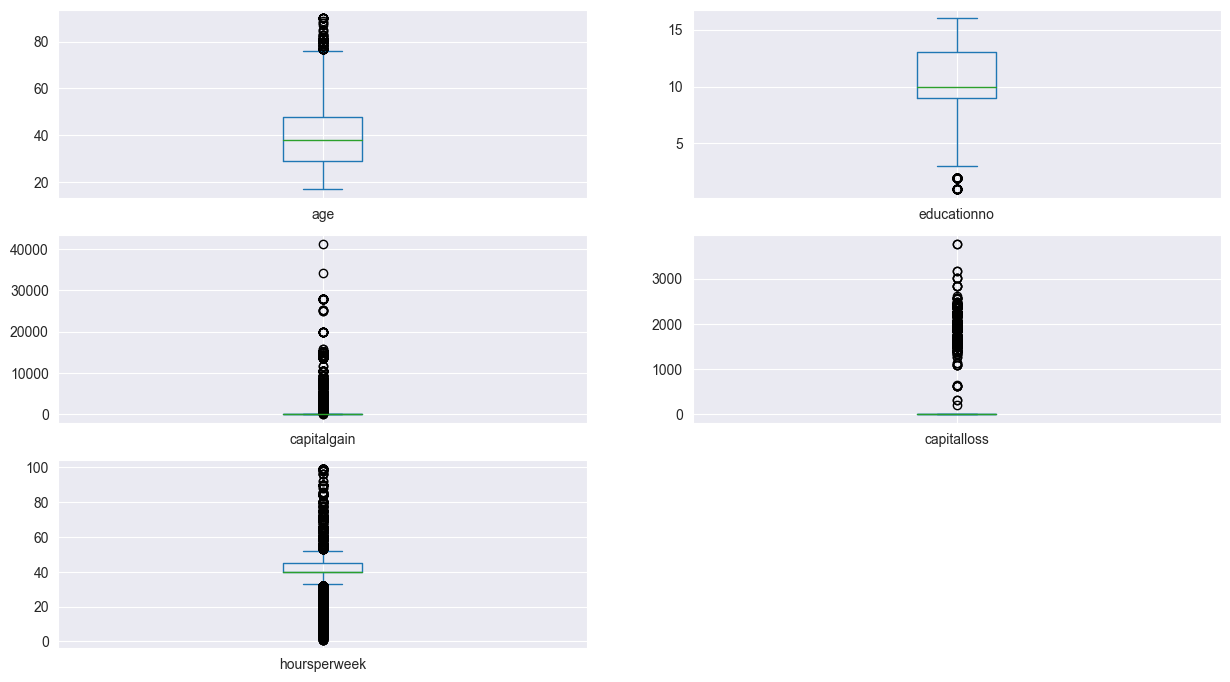

In [87]:
# Box plot find the outliers 

box_plot = test_cont_df2.plot(kind="box",subplots=True,layout=(7,2),figsize=(15,20));

# Calculate the IQR for each variable
Q1 = test_cont_df2.quantile(0.25)
Q3 = test_cont_df2.quantile(0.75)
IQR = Q3 - Q1

# Set the IQR multiplier for identifying potential outliers
IQR_multiplier = 1.5  # Adjust as needed

# Get the indices of the outliers
outlier_indices = []

for col, ax in zip(test_cont_df2.columns, box_plot):
    outliers = ((test_cont_df2[col] < (Q1[col] - IQR_multiplier * IQR[col])) | (test_cont_df2[col] > (Q3[col] + IQR_multiplier * IQR[col])))
    col_outlier_indices = test_cont_df2.index[outliers]
    outlier_indices.extend(col_outlier_indices)

outlier_indices = list(set(outlier_indices))  # Remove duplicate indices

# Display the outlier indices
print("Indices of outliers from the box plots:")
print(outlier_indices)
print(len(outlier_indices))

In [88]:
test_cont_df2

,age,educationno,capitalgain,capitalloss,hoursperweek
0,25,7,0,0,40
1,38,9,0,0,50
2,28,12,0,0,40
3,44,10,7688,0,40
4,34,6,0,0,30
...,...,...,...,...,...
14125,33,13,0,0,40
14126,39,13,0,0,36
14127,38,13,0,0,50
14128,44,13,5455,0,40


In [89]:
# Correlation matrix to check the multi collinearity of the features
test_cont_df2.corr()

,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.000000,0.021979,0.104533,0.053172,0.088090
educationno,0.021979,1.000000,0.139391,0.085651,0.127779
capitalgain,0.104533,0.139391,1.000000,-0.053492,0.079092
capitalloss,0.053172,0.085651,-0.053492,1.000000,0.056353
hoursperweek,0.088090,0.127779,0.079092,0.056353,1.000000


<AxesSubplot: >

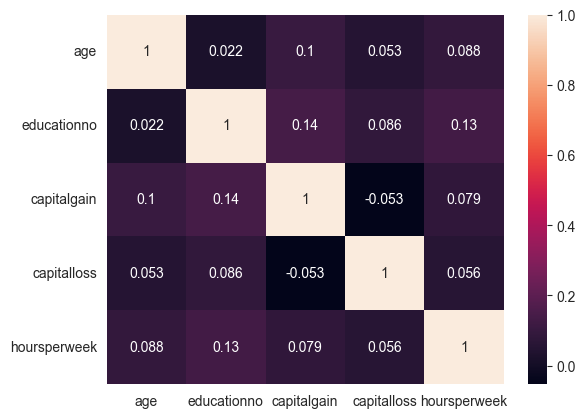

In [90]:
# Heatmaps for the given dataset.
sns.heatmap(test_cont_df2.corr(), annot=True)

### None of the value is near or equal to 1 or -1 for the continuous features. Hence no multicolinearity present.

In [91]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
def calculate_vif(data_frame):
    vif_data = pd.DataFrame()
    vif_data["feature"] = data_frame.columns
    vif_data["VIF"] = [variance_inflation_factor(data_frame.values, i) for i in range(data_frame.shape[1])]
    return vif_data

vif_results = calculate_vif(test_cont_df2)  
print("VIF Results:")
print(vif_results)

VIF Results:
        feature        VIF
0           age   7.522765
1   educationno  10.146945
2   capitalgain   1.076907
3   capitalloss   1.063551
4  hoursperweek   9.704043


### VIF value for all the features is very low. Hence all the variables are significant and there is no presence of multicollinearity.
### From both the correlation matrix and the VIF value show that none of the feature depend on each other. Hence there is no multicollinearity present in the dataset.

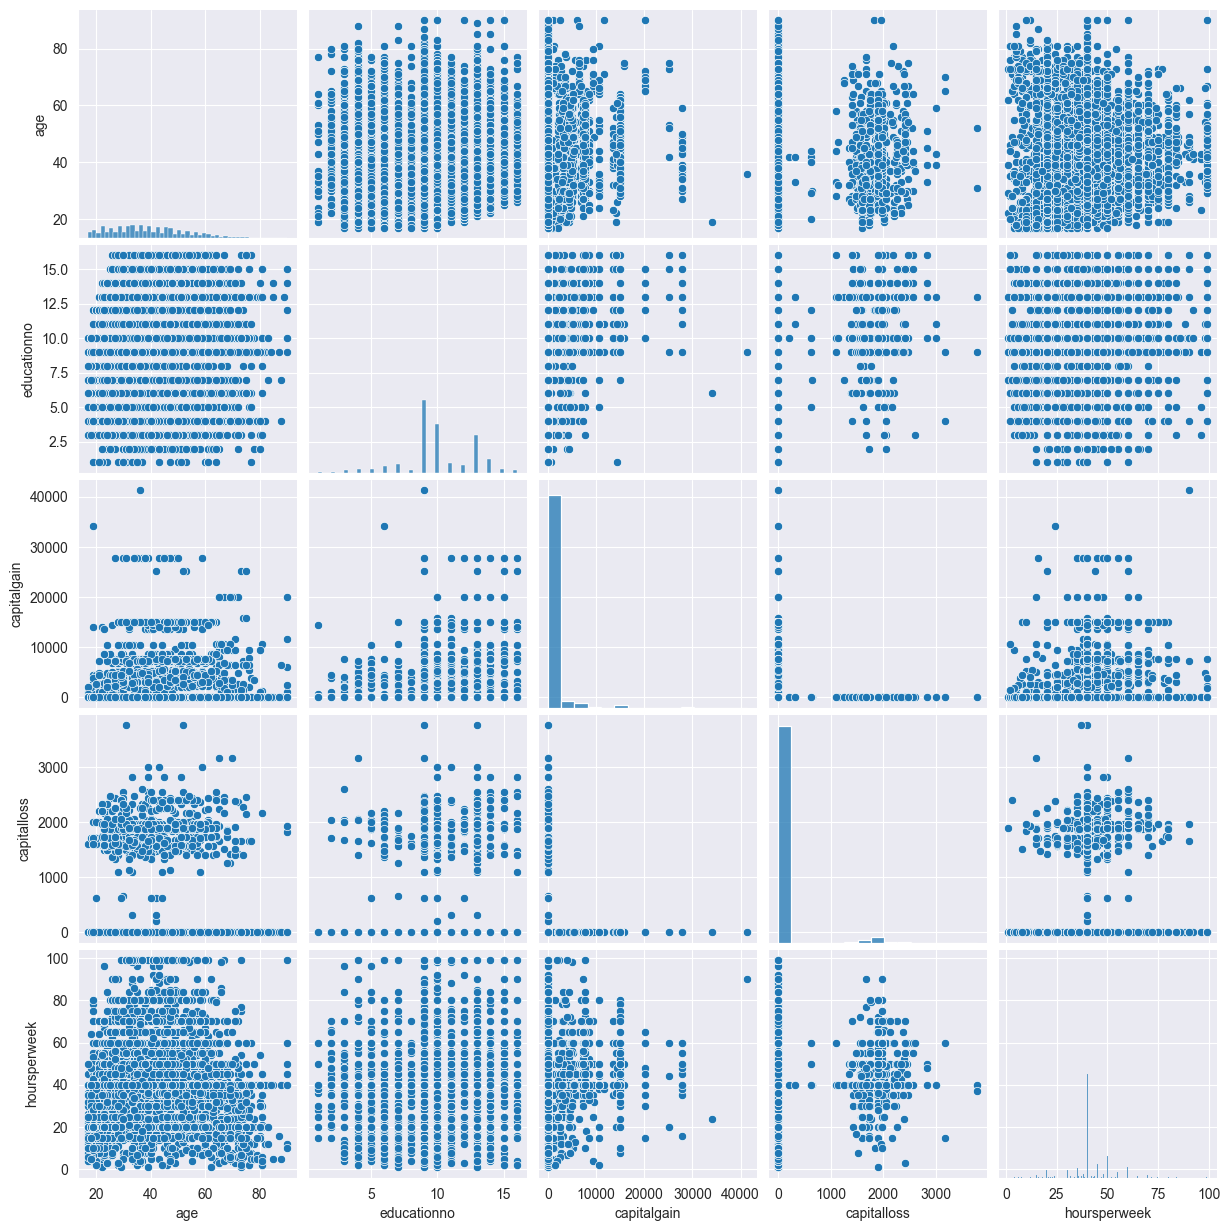

In [92]:
# Drawing Histogram to check the distribution of the data.
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(test_cont_df2)

### Most of the histogram shows that the features are not normally distributed.

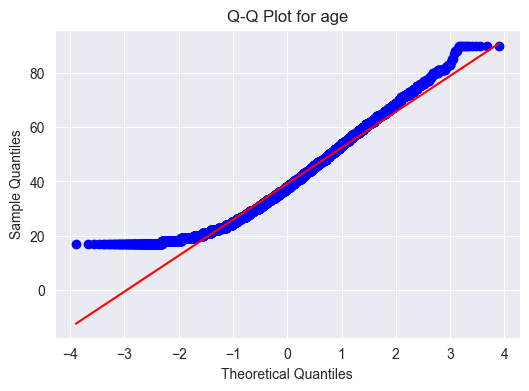

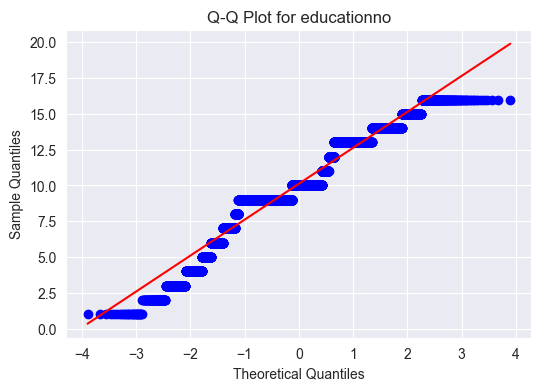

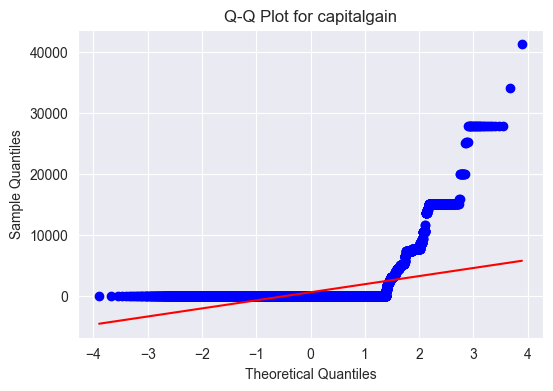

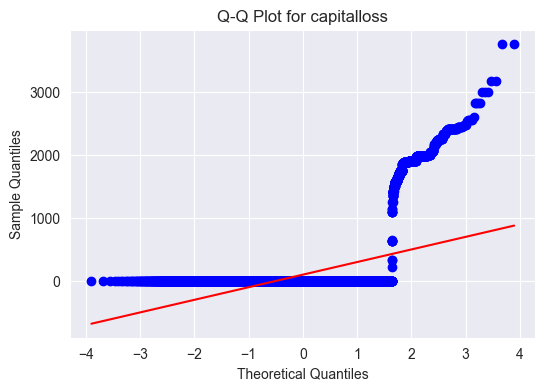

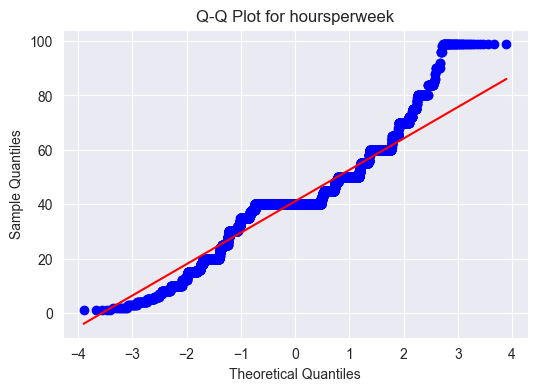

In [93]:
# Using Q-Q plot for checking the data distribution
# Create Q-Q plots for each variable in separate graphs
for col in test_cont_df2.columns:
    plt.figure(figsize=(6, 4))
    stats.probplot(test_cont_df2[col], dist="norm", plot=plt)
    plt.title(f"Q-Q Plot for {col}")
    plt.xlabel("Theoretical Quantiles")
    plt.ylabel("Sample Quantiles")
    plt.grid(True)
    plt.show()

### Most of the Q-Q plot shows that features are not normally distributed.
### Hence we can use Normalization for transformation.

In [94]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the Normalization
min_max_scaler = MinMaxScaler()

# Fit and transform the data using standardization
normalized_data_minmax = min_max_scaler.fit_transform(test_cont_df2)


# Create a new DataFrame with the standardized data
test_norm_df = pd.DataFrame(normalized_data_minmax, columns = test_cont_df2.columns)

In [95]:
test_norm_df

,age,educationno,capitalgain,capitalloss,hoursperweek
0,0.109589,0.400000,0.000000,0.0,0.397959
1,0.287671,0.533333,0.000000,0.0,0.500000
2,0.150685,0.733333,0.000000,0.0,0.397959
3,0.369863,0.600000,0.186105,0.0,0.397959
4,0.232877,0.333333,0.000000,0.0,0.295918
...,...,...,...,...,...
14125,0.219178,0.800000,0.000000,0.0,0.397959
14126,0.301370,0.800000,0.000000,0.0,0.357143
14127,0.287671,0.800000,0.000000,0.0,0.500000
14128,0.369863,0.800000,0.132050,0.0,0.397959


### Pre-processing of Testing Categorical variable dataframe.

In [96]:
test_cat_df.head(5)

,workclass,education,maritalstatus,occupation,relationship,race,sex,native,Salary
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,<=50K
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,<=50K
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,>50K
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,>50K
4,Private,10th,Never-married,Other-service,Not-in-family,White,Male,United-States,<=50K


In [97]:
# Replace 'desired_columns' with a list of column names for which you want to find unique values
desired_columns = ["workclass", "education", "maritalstatus", "occupation", "relationship", "race", "sex", "native", "Salary"]

# Create an empty dictionary to store unique values for each column
unique_values_dict = {}

# Loop through the desired columns and find unique values for each
for column in desired_columns:
    unique_values = test_cat_df[column].unique()
    unique_values_dict[column] = unique_values

In [98]:
unique_values_dict

{'workclass': array([' Private', ' Local-gov', ' Self-emp-not-inc', ' Federal-gov',
        ' State-gov', ' Self-emp-inc', ' Without-pay'], dtype=object),
 'education': array([' 11th', ' HS-grad', ' Assoc-acdm', ' Some-college', ' 10th',
        ' Prof-school', ' 7th-8th', ' Bachelors', ' Masters', ' 5th-6th',
        ' Assoc-voc', ' 9th', ' Doctorate', ' 12th', ' 1st-4th',
        ' Preschool'], dtype=object),
 'maritalstatus': array([' Never-married', ' Married-civ-spouse', ' Widowed', ' Separated',
        ' Divorced', ' Married-spouse-absent', ' Married-AF-spouse'],
       dtype=object),
 'occupation': array([' Machine-op-inspct', ' Farming-fishing', ' Protective-serv',
        ' Other-service', ' Prof-specialty', ' Craft-repair',
        ' Adm-clerical', ' Exec-managerial', ' Tech-support', ' Sales',
        ' Priv-house-serv', ' Transport-moving', ' Handlers-cleaners',
        ' Armed-Forces'], dtype=object),
 'relationship': array([' Own-child', ' Husband', ' Not-in-family', ' U

### Applying Label encoder to Sex column as it has only two categories.

In [99]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
encoder = LabelEncoder()

# Fit and transform the dataset
encoded_labels = encoder.fit_transform(test_cat_df["sex"])

# Add encoded labels to the DataFrame
test_cat_df["sex"] = encoded_labels

### Applying Label encoder to Salary column as it has only two categories.

In [100]:
# Initialize LabelEncoder
encoder = LabelEncoder()

# Fit and transform the dataset
encoded_labels = encoder.fit_transform(test_cat_df["Salary"])

# Add encoded labels to the DataFrame
test_cat_df["Salary"] = encoded_labels

In [101]:
test_cat_df

,workclass,education,maritalstatus,occupation,relationship,race,sex,native,Salary
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,1,United-States,0
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,1,United-States,0
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,1,United-States,1
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,1,United-States,1
4,Private,10th,Never-married,Other-service,Not-in-family,White,1,United-States,0
...,...,...,...,...,...,...,...,...,...
14125,Private,Bachelors,Never-married,Prof-specialty,Own-child,White,1,United-States,0
14126,Private,Bachelors,Divorced,Prof-specialty,Not-in-family,White,0,United-States,0
14127,Private,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,1,United-States,0
14128,Private,Bachelors,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,1,United-States,0


In [102]:
# Rearrange dataframe

test_cat_df = test_cat_df[["sex", "Salary", "workclass", "education", "maritalstatus", "occupation", "relationship", "race", "native"]]

In [103]:
test_cat_df

,sex,Salary,workclass,education,maritalstatus,occupation,relationship,race,native
0,1,0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,United-States
1,1,0,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,United-States
2,1,1,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,United-States
3,1,1,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,United-States
4,1,0,Private,10th,Never-married,Other-service,Not-in-family,White,United-States
...,...,...,...,...,...,...,...,...,...
14125,1,0,Private,Bachelors,Never-married,Prof-specialty,Own-child,White,United-States
14126,0,0,Private,Bachelors,Divorced,Prof-specialty,Not-in-family,White,United-States
14127,1,0,Private,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,United-States
14128,1,0,Private,Bachelors,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,United-States


### Applying dummy variables on WorkClass column.

In [104]:
import pandas as pd

# Create dummy variables for the 'Category' column
dummy_df = pd.get_dummies(test_cat_df['workclass'], prefix='workclass', drop_first=True)

# Drop the original 'Category' column from the original DataFrame
test_cat_df.drop(columns=['workclass'], inplace=True)

# Concatenate the original DataFrame and the dummy DataFrame
test_cat_df = pd.concat([test_cat_df, dummy_df], axis=1)

In [105]:
test_cat_df

,sex,Salary,education,maritalstatus,occupation,relationship,race,native,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay
0,1,0,11th,Never-married,Machine-op-inspct,Own-child,Black,United-States,0,1,0,0,0,0
1,1,0,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,United-States,0,1,0,0,0,0
2,1,1,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,United-States,1,0,0,0,0,0
3,1,1,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,United-States,0,1,0,0,0,0
4,1,0,10th,Never-married,Other-service,Not-in-family,White,United-States,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14125,1,0,Bachelors,Never-married,Prof-specialty,Own-child,White,United-States,0,1,0,0,0,0
14126,0,0,Bachelors,Divorced,Prof-specialty,Not-in-family,White,United-States,0,1,0,0,0,0
14127,1,0,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,United-States,0,1,0,0,0,0
14128,1,0,Bachelors,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,United-States,0,1,0,0,0,0


### Applying dummy variables on Education column.

In [106]:
import pandas as pd

# Create dummy variables for the 'Category' column
dummy_df1 = pd.get_dummies(test_cat_df['education'], prefix='education', drop_first=True)

# Drop the original 'Category' column from the original DataFrame
test_cat_df.drop(columns=['education'], inplace=True)

# Concatenate the original DataFrame and the dummy DataFrame
test_cat_df = pd.concat([test_cat_df, dummy_df1], axis=1)

In [107]:
test_cat_df

,sex,Salary,maritalstatus,occupation,relationship,race,native,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college
0,1,0,Never-married,Machine-op-inspct,Own-child,Black,United-States,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,Married-civ-spouse,Farming-fishing,Husband,White,United-States,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,1,1,Married-civ-spouse,Protective-serv,Husband,White,United-States,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1,1,Married-civ-spouse,Machine-op-inspct,Husband,Black,United-States,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,1,0,Never-married,Other-service,Not-in-family,White,United-States,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14125,1,0,Never-married,Prof-specialty,Own-child,White,United-States,0,1,0,...,0,0,0,1,0,0,0,0,0,0
14126,0,0,Divorced,Prof-specialty,Not-in-family,White,United-States,0,1,0,...,0,0,0,1,0,0,0,0,0,0
14127,1,0,Married-civ-spouse,Prof-specialty,Husband,White,United-States,0,1,0,...,0,0,0,1,0,0,0,0,0,0
14128,1,0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,United-States,0,1,0,...,0,0,0,1,0,0,0,0,0,0


### Applying dummy variables on Marital Status column.

In [108]:
import pandas as pd

# Create dummy variables for the 'Category' column
dummy_df2 = pd.get_dummies(test_cat_df['maritalstatus'], prefix='maritalstatus', drop_first=True)

# Drop the original 'Category' column from the original DataFrame
test_cat_df.drop(columns=['maritalstatus'], inplace=True)

# Concatenate the original DataFrame and the dummy DataFrame
test_cat_df = pd.concat([test_cat_df, dummy_df2], axis=1)

In [109]:
test_cat_df

,sex,Salary,occupation,relationship,race,native,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,maritalstatus_ Married-AF-spouse,maritalstatus_ Married-civ-spouse,maritalstatus_ Married-spouse-absent,maritalstatus_ Never-married,maritalstatus_ Separated,maritalstatus_ Widowed
0,1,0,Machine-op-inspct,Own-child,Black,United-States,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,Farming-fishing,Husband,White,United-States,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,1,Protective-serv,Husband,White,United-States,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1,1,Machine-op-inspct,Husband,Black,United-States,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0
4,1,0,Other-service,Not-in-family,White,United-States,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14125,1,0,Prof-specialty,Own-child,White,United-States,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
14126,0,0,Prof-specialty,Not-in-family,White,United-States,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
14127,1,0,Prof-specialty,Husband,White,United-States,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
14128,1,0,Adm-clerical,Own-child,Asian-Pac-Islander,United-States,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### Applying dummy variables on Occupation column.

In [110]:
import pandas as pd

# Create dummy variables for the 'Category' column
dummy_df3 = pd.get_dummies(test_cat_df['occupation'], prefix='occupation', drop_first=True)

# Drop the original 'Category' column from the original DataFrame
test_cat_df.drop(columns=['occupation'], inplace=True)

# Concatenate the original DataFrame and the dummy DataFrame
test_cat_df = pd.concat([test_cat_df, dummy_df3], axis=1)

In [111]:
test_cat_df

,sex,Salary,relationship,race,native,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving
0,1,0,Own-child,Black,United-States,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1,0,Husband,White,United-States,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1,1,Husband,White,United-States,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,1,Husband,Black,United-States,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,Not-in-family,White,United-States,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14125,1,0,Own-child,White,United-States,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
14126,0,0,Not-in-family,White,United-States,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
14127,1,0,Husband,White,United-States,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
14128,1,0,Own-child,Asian-Pac-Islander,United-States,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Applying dummy variables on Relationship column.

In [112]:
import pandas as pd

# Create dummy variables for the 'Category' column
dummy_df4 = pd.get_dummies(test_cat_df['relationship'], prefix='relationship', drop_first=True)

# Drop the original 'Category' column from the original DataFrame
test_cat_df.drop(columns=['relationship'], inplace=True)

# Concatenate the original DataFrame and the dummy DataFrame
test_cat_df = pd.concat([test_cat_df, dummy_df4], axis=1)

In [113]:
test_cat_df

,sex,Salary,race,native,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,...,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife
0,1,0,Black,United-States,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,White,United-States,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,White,United-States,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1,1,Black,United-States,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,White,United-States,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14125,1,0,White,United-States,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
14126,0,0,White,United-States,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
14127,1,0,White,United-States,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
14128,1,0,Asian-Pac-Islander,United-States,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


### Applying dummy variables on Race column.

In [114]:
import pandas as pd

# Create dummy variables for the 'Category' column
dummy_df5 = pd.get_dummies(test_cat_df['race'], prefix='race', drop_first=True)

# Drop the original 'Category' column from the original DataFrame
test_cat_df.drop(columns=['race'], inplace=True)

# Concatenate the original DataFrame and the dummy DataFrame
test_cat_df = pd.concat([test_cat_df, dummy_df5], axis=1)

In [115]:
test_cat_df

,sex,Salary,native,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 11th,...,occupation_ Transport-moving,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White
0,1,0,United-States,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
1,1,0,United-States,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,1,United-States,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,1,United-States,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,United-States,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14125,1,0,United-States,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
14126,0,0,United-States,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
14127,1,0,United-States,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
14128,1,0,United-States,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


### Applying dummy variables on Native column.

In [116]:
import pandas as pd

# Create dummy variables for the 'Category' column
dummy_df6 = pd.get_dummies(test_cat_df['native'], prefix='native', drop_first=True)

# Drop the original 'Category' column from the original DataFrame
test_cat_df.drop(columns=['native'], inplace=True)

# Concatenate the original DataFrame and the dummy DataFrame
test_cat_df = pd.concat([test_cat_df, dummy_df6], axis=1)

In [117]:
test_cat_df

,sex,Salary,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 11th,education_ 12th,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14125,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
14126,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
14127,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
14128,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


### Mearging training normalized continuous variable dataframe and encoded dataframe. 

In [118]:
# Concatenate the original DataFrame and the encoded DataFrame
test_norm_final_df = pd.concat([test_norm_df, test_cat_df], axis=1)

In [119]:
test_norm_final_df

,age,educationno,capitalgain,capitalloss,hoursperweek,sex,Salary,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,0.109589,0.400000,0.000000,0.0,0.397959,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,0.287671,0.533333,0.000000,0.0,0.500000,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,0.150685,0.733333,0.000000,0.0,0.397959,1,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.369863,0.600000,0.186105,0.0,0.397959,1,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0.232877,0.333333,0.000000,0.0,0.295918,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14125,0.219178,0.800000,0.000000,0.0,0.397959,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
14126,0.301370,0.800000,0.000000,0.0,0.357143,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
14127,0.287671,0.800000,0.000000,0.0,0.500000,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
14128,0.369863,0.800000,0.132050,0.0,0.397959,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


### Mearging original continuous variable dataframe and encoded dataframe. 

In [120]:
# Concatenate the original DataFrame and the encoded DataFrame
test_org_final_df = pd.concat([test_cont_df2, test_cat_df], axis=1)

In [121]:
test_org_final_df

,age,educationno,capitalgain,capitalloss,hoursperweek,sex,Salary,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,25,7,0,0,40,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,38,9,0,0,50,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,28,12,0,0,40,1,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,10,7688,0,40,1,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,34,6,0,0,30,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14125,33,13,0,0,40,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
14126,39,13,0,0,36,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
14127,38,13,0,0,50,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
14128,44,13,5455,0,40,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


## Model building

In [122]:
train_norm_final_df.head(2)

,age,educationno,capitalgain,capitalloss,hoursperweek,sex,Salary,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,0.301370,0.8,0.052626,0.0,0.397959,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.452055,0.8,0.000000,0.0,0.122449,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [123]:
test_norm_final_df.head(2)

,age,educationno,capitalgain,capitalloss,hoursperweek,sex,Salary,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,0.109589,0.400000,0.0,0.0,0.397959,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,0.287671,0.533333,0.0,0.0,0.500000,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


### Model building on normalized dataset. 

In [124]:
# Extract the features (X) and target variable (y)
X_train = train_norm_final_df.drop(columns=["Salary"])  # Replace "target_column" with the actual column name
y_train = train_norm_final_df["Salary"]

In [125]:
# Extract the features (X) and target variable (y)
X_test = test_norm_final_df.drop(columns=["Salary"])  # Replace "target_column" with the actual column name
y_test = test_norm_final_df["Salary"]

In [126]:
# Importing train - test split , K-fold Cross validation and accuracy score and classification report 

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [127]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize an SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)

# Train the SVM model on the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.843382873319179
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.93      0.90     10620
           1       0.73      0.58      0.65      3510

    accuracy                           0.84     14130
   macro avg       0.80      0.76      0.77     14130
weighted avg       0.84      0.84      0.84     14130

Confusion Matrix:
 [[9878  742]
 [1471 2039]]


###  K-fold cross validation.

In [128]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Define the SVM classifier with your desired hyperparameters
svm_classifier = SVC(kernel='linear', C=1.0)

# Perform k-fold cross-validation (e.g., 5-fold)
k = 5
cv_scores = cross_val_score(svm_classifier, X_train, y_train, cv=k)

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))


Cross-Validation Scores: [0.83497491 0.83571827 0.84426686 0.84312268 0.84144981]
Mean Accuracy: 0.8399065070615389


In [129]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Define the SVM classifier with your desired hyperparameters
svm_classifier = SVC(kernel='poly', C=1.0)

# Perform k-fold cross-validation (e.g., 5-fold)
k = 5
cv_scores = cross_val_score(svm_classifier, X_train, y_train, cv=k)

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))


Cross-Validation Scores: [0.83627579 0.83441739 0.8411076  0.84460967 0.83884758]
Mean Accuracy: 0.8390516059189397


### From the above models we can conclude that best model is built using linear kernel and normalized data.  

## Final Model 

In [130]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Create and train the SVC model
svc_model = SVC(kernel='linear', C=1.0)
svc_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svc_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report_str)


Accuracy: 0.84
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90     10620
           1       0.73      0.58      0.65      3510

    accuracy                           0.84     14130
   macro avg       0.80      0.76      0.77     14130
weighted avg       0.84      0.84      0.84     14130



### Confusion matrix for model accuracy.

In [131]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred)
print (confusion_matrix)

[[9878  742]
 [1471 2039]]


### Classification report for model performance 

In [132]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90     10620
           1       0.73      0.58      0.65      3510

    accuracy                           0.84     14130
   macro avg       0.80      0.76      0.77     14130
weighted avg       0.84      0.84      0.84     14130



In [133]:
# Merge the dataframes vertically
X = pd.concat([X_train, X_test], axis=0)

# Reset the index of the merged dataframe
X.reset_index(drop=True, inplace=True)

# Display the merged dataframe
print(X)

            age  educationno  capitalgain  capitalloss  hoursperweek  sex  \
0      0.301370     0.800000     0.052626          0.0      0.397959    1   
1      0.452055     0.800000     0.000000          0.0      0.122449    1   
2      0.287671     0.533333     0.000000          0.0      0.397959    1   
3      0.493151     0.400000     0.000000          0.0      0.397959    1   
4      0.150685     0.800000     0.000000          0.0      0.397959    0   
...         ...          ...          ...          ...           ...  ...   
41028  0.219178     0.800000     0.000000          0.0      0.397959    1   
41029  0.301370     0.800000     0.000000          0.0      0.357143    0   
41030  0.287671     0.800000     0.000000          0.0      0.500000    1   
41031  0.369863     0.800000     0.132050          0.0      0.397959    1   
41032  0.246575     0.800000     0.000000          0.0      0.602041    1   

       workclass_ Local-gov  workclass_ Private  workclass_ Self-emp-inc  \

In [134]:
# Merge the dataframes vertically
y = pd.concat([y_train, y_test], axis=0)

# Reset the index of the merged dataframe
y.reset_index(drop=True, inplace=True)

# Display the merged dataframe
print(y)

0        0
1        0
2        0
3        0
4        0
        ..
41028    0
41029    0
41030    0
41031    0
41032    1
Name: Salary, Length: 41033, dtype: int32


### ROC Curve for the model built using SVM and normaliazed dataset.

AUC: 0.89


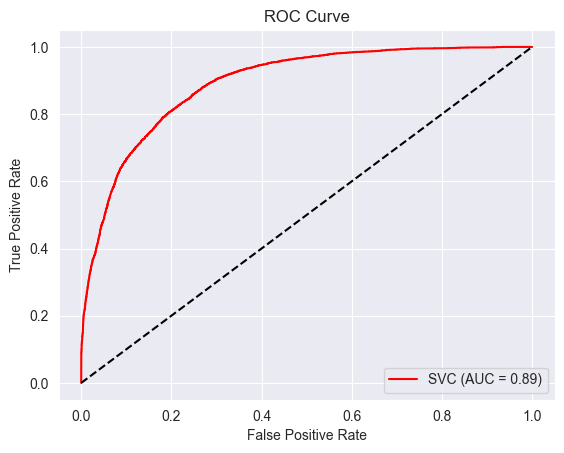

In [135]:
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Create an SVM model with probability estimation enabled
svc_model = SVC(probability=True)

# Train the model
svc_model.fit(X_train, y_train)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, svc_model.predict_proba(X_test)[:, 1])
auc = roc_auc_score(y_test, svc_model.predict_proba(X_test)[:, 1])
print(f"AUC: {auc:.2f}")

# Plot ROC curve
plt.plot(fpr, tpr, color='red', label=f'SVC (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


### The area under the curve is 0.89 which is almost equal to 0.9 which concludes its a very good classifier. Hence we can finalise the model.

### Decision Boundary Plot using PCA

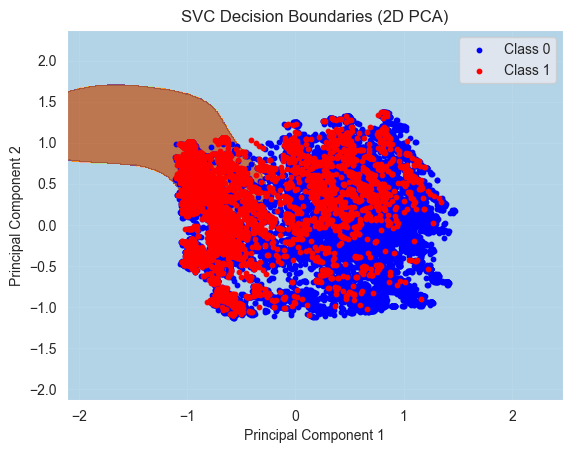

In [140]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from sklearn.svm import SVC

# Merge the dataframes vertically
X = pd.concat([X_train, X_test], axis=0)

# Reset the index of the merged dataframe
X.reset_index(drop=True, inplace=True)

# Reduce dimensionality to 2 using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create an SVM model with probability estimation enabled
svc_model1 = SVC(probability=True)

# Train the model
svc_model1.fit(X_pca, y)

# Create a mesh grid for decision boundary visualization
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict the class for each point in the mesh grid
Z = svc_model1.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)

# Scatter plot for each class with labels
plt.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], c='blue', marker='o', label='Class 0', s=10)
plt.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], c='red', marker='o', label='Class 1', s=10)# Add legends for the classes
plt.legend(loc='upper right')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('SVC Decision Boundaries (2D PCA)')
plt.show()
